<a href="https://colab.research.google.com/github/moatazkrimchi/Deep-learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# importer les packages 
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [16]:
# chargement de la base de données 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

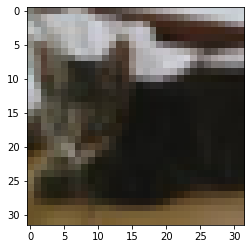

In [17]:
plt.imshow(X_train[9])

In [18]:
X_train[9]

array([[[125, 125, 116],
        [110, 101,  91],
        [102,  90,  83],
        ...,
        [202, 207, 214],
        [200, 205, 212],
        [202, 208, 214]],

       [[142, 146, 142],
        [146, 144, 139],
        [176, 172, 170],
        ...,
        [195, 201, 205],
        [198, 205, 209],
        [204, 211, 215]],

       [[180, 185, 183],
        [143, 146, 146],
        [156, 157, 157],
        ...,
        [122, 111, 113],
        [139, 128, 131],
        [158, 147, 150]],

       ...,

       [[104,  82,  41],
        [101,  80,  39],
        [101,  81,  38],
        ...,
        [126, 103,  67],
        [126, 103,  69],
        [125, 101,  68]],

       [[104,  81,  40],
        [105,  84,  41],
        [109,  88,  43],
        ...,
        [138, 113,  78],
        [137, 113,  80],
        [137, 112,  81]],

       [[105,  83,  42],
        [108,  87,  45],
        [115,  94,  50],
        ...,
        [143, 117,  82],
        [143, 116,  84],
        [144, 116,  86]]

In [19]:
# normalisation
X_train = X_train/255.0
X_test = X_test/255.0

In [20]:
X_train[9]

array([[[0.49019608, 0.49019608, 0.45490196],
        [0.43137255, 0.39607843, 0.35686275],
        [0.4       , 0.35294118, 0.3254902 ],
        ...,
        [0.79215686, 0.81176471, 0.83921569],
        [0.78431373, 0.80392157, 0.83137255],
        [0.79215686, 0.81568627, 0.83921569]],

       [[0.55686275, 0.57254902, 0.55686275],
        [0.57254902, 0.56470588, 0.54509804],
        [0.69019608, 0.6745098 , 0.66666667],
        ...,
        [0.76470588, 0.78823529, 0.80392157],
        [0.77647059, 0.80392157, 0.81960784],
        [0.8       , 0.82745098, 0.84313725]],

       [[0.70588235, 0.7254902 , 0.71764706],
        [0.56078431, 0.57254902, 0.57254902],
        [0.61176471, 0.61568627, 0.61568627],
        ...,
        [0.47843137, 0.43529412, 0.44313725],
        [0.54509804, 0.50196078, 0.51372549],
        [0.61960784, 0.57647059, 0.58823529]],

       ...,

       [[0.40784314, 0.32156863, 0.16078431],
        [0.39607843, 0.31372549, 0.15294118],
        [0.39607843, 0

In [21]:
# creation du model 
model = Sequential()


In [22]:
X_train.shape

(50000, 32, 32, 3)

In [23]:
# cree le reseau de convolution (cnn)
model.add(Conv2D(256,(3,3),input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [24]:
#ajouter une chouche de convoluion 
model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [25]:
model.add(Flatten())

In [26]:
# le complement connecté
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['sparse_categorical_accuracy'])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 256)       7168      
                                                                 
 activation_3 (Activation)   (None, 30, 30, 256)       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 256)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 256)       590080    
                                                                 
 activation_4 (Activation)   (None, 13, 13, 256)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 256)        0         
 2D)                                                  

In [28]:
# entrainer le modèle
model.fit(X_train,y_train,batch_size=32,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 677s 433ms/step - loss: 1.4281 - sparse_categorical_accuracy: 0.4898
Epoch 2/10
1563/1563 [==============================] - 671s 430ms/step - loss: 1.1022 - sparse_categorical_accuracy: 0.6165
Epoch 3/10
1563/1563 [==============================] - 668s 427ms/step - loss: 0.9958 - sparse_categorical_accuracy: 0.6544
Epoch 4/10
1563/1563 [==============================] - 667s 427ms/step - loss: 0.9328 - sparse_categorical_accuracy: 0.6754
Epoch 5/10
1563/1563 [==============================] - 667s 427ms/step - loss: 0.8864 - sparse_categorical_accuracy: 0.6914
Epoch 6/10
1563/1563 [==============================] - 667s 427ms/step - loss: 0.8486 - sparse_categorical_accuracy: 0.7027
Epoch 7/10
1563/1563 [==============================] - 667s 426ms/step - loss: 0.8119 - sparse_categorical_accuracy: 0.7180
Epoch 8/10
1563/1563 [==============================] - 666s 426ms/step - loss: 0.7883 - sparse_categorical_accuracy: 0.7268


In [29]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 35s 110ms/step - loss: 0.9085 - sparse_categorical_accuracy: 0.6878
